**Today Objectives**
    1. Dimensionality Reduction
    2. Decision Tree classifier

### Dimensionality Reduction
1. Feature Elimination
2. Feature Extraction

transforming the M number of features into N number of featues N<M

**Principal Component Analysis(PCA)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Import the breast cancer dataset from sklearn.datasets**

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
# cancer is simple dict variable
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**creating data frame from cancer data**

In [7]:
df = pd.DataFrame(cancer['data'])
df.columns = cancer['feature_names']
df['target'] = cancer['target']
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [6]:
df.shape

(569, 31)

**How many samples for class 1 and How many for class 0**

In [10]:
df['target'].unique()

array([0, 1], dtype=int64)

In [13]:
df['target'].value_counts()
# 357 examples for class 1 and 212 examples for class 0 

1    357
0    212
Name: target, dtype: int64

In [16]:
df.columns[:-1]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [14]:
X = df[df.columns[:-1]]
X.shape

(569, 30)

In [17]:
y = df['target']
y.shape

(569,)

**verifying score without pca**

In [18]:
from sklearn.neighbors import KNeighborsClassifier 

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.score(X,y)

0.9472759226713533

**How many features given to my model?**

**we given 30 columns**

#### applying PCA

1. Standardize the data into same scale

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# creating object
scaler = StandardScaler()
# transform the features
X_transformed = scaler.fit_transform(X)

**import the PCA**

In [22]:
from sklearn.decomposition import PCA

In [37]:
pcaObj = PCA(n_components=2) # transform to 2 columns or 2 components
pca_cancer_data = pcaObj.fit_transform(X_transformed)
# converting array into df
pca_df = pd.DataFrame(pca_cancer_data)
pca_df.head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [38]:
pcaObj.explained_variance_ratio_*100

array([44.27202561, 18.97118204])

**37% information we lost (100-(44.27+18.97))

In [39]:
pca_df.head(1)

,0,1
0,9.192837,1.948583


**we can visualize pca df with target**

In [40]:
pca_df['target'] = y
pca_df.head(1)

,0,1,target
0,9.192837,1.948583,0


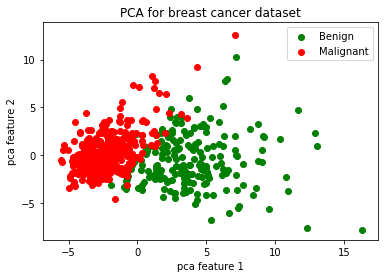

In [48]:
plt.figure()
colors = {1:'red',0:'green'}
targets = [0,1]
for target in targets:
    indicesToKeep = pca_df['target'] == target
    plt.scatter(
        pca_df.loc[indicesToKeep,0],
        pca_df.loc[indicesToKeep,1],
        c=colors[target]
    )
plt.xlabel('pca feature 1')
plt.ylabel('pca feature 2')
plt.title('PCA for breast cancer dataset')
plt.legend(['Benign','Malignant'])

plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
X = pca_df[pca_df.columns[:-1]]
X.shape

(569, 2)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
knn.score(X,y)

0.9525483304042179

### Decision Tree

Decision Tree algorithm is the tree based algorithm for predict the data

<img src="Screenshot (84).png" height="300px" width="400px">

Decision Tree classifier for iris dataset

In [57]:
from sklearn.datasets import load_iris

In [58]:
iris = load_iris()

In [59]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [60]:
iris_df = pd.DataFrame(iris['data'])
iris_df.columns = iris['feature_names']
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
iris_df.shape

(150, 5)

In [62]:
X = iris_df[iris_df.columns[:-1]]
X.shape

(150, 4)

In [63]:
y = iris_df['target']
y.shape

(150,)

In [64]:
y.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
clf = DecisionTreeClassifier()
clf.fit(X,y)
clf.score(X,y)

1.0

In [67]:
from sklearn.tree import export_graphviz

In [72]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [75]:
export_graphviz(
    clf,
    out_file='iris.dot',
    feature_names= iris_df.columns[:-1],
    class_names= iris['target_names']
)

**Manipulating missing values**

In [76]:
df = pd.read_csv('patientsdata.csv')
df

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,NaN,36.0,30.0
2,lakshman,100.0,1000.0,NaN
3,lakshmi,NaN,NaN,NaN


**finding missing in each column**

In [79]:
df.isna().sum()

name           0
BP             2
temperature    1
age            2
dtype: int64

**finding missing value row wise**

In [81]:
df.T.isna().sum()

0    0
1    1
2    1
3    3
dtype: int64

In [82]:
df

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,NaN,36.0,30.0
2,lakshman,100.0,1000.0,NaN
3,lakshmi,NaN,NaN,NaN


**replacing all missing values with single value**

In [86]:
df.fillna(1000)

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,1000.0,36.0,30.0
2,lakshman,100.0,1000.0,1000.0
3,lakshmi,1000.0,1000.0,1000.0


In [87]:
df.isna().sum()

name           0
BP             2
temperature    1
age            2
dtype: int64

In [88]:
df.fillna('10000',inplace=True)

In [90]:
df.isna().sum()

name           0
BP             0
temperature    0
age            0
dtype: int64

In [93]:
df = pd.read_csv('patientsdata.csv')
df

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,NaN,36.0,30.0
2,lakshman,100.0,1000.0,NaN
3,lakshmi,NaN,NaN,NaN


In [95]:
df.fillna({'BP': 90, 'temperature': 35, 'age': 60})

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,90.0,36.0,30.0
2,lakshman,100.0,1000.0,60.0
3,lakshmi,90.0,35.0,60.0


In [112]:
df

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,NaN,36.0,30.0
2,lakshman,100.0,1000.0,NaN
3,lakshmi,NaN,NaN,NaN


In [113]:
df.bfill()

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,100.0,36.0,30.0
2,lakshman,100.0,1000.0,NaN
3,lakshmi,NaN,NaN,NaN


In [114]:
df

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,NaN,36.0,30.0
2,lakshman,100.0,1000.0,NaN
3,lakshmi,NaN,NaN,NaN


In [115]:
df.ffill()

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,90.0,36.0,30.0
2,lakshman,100.0,1000.0,30.0
3,lakshmi,100.0,1000.0,30.0


In [121]:
df.fillna(df['temperature'].mean())

,name,BP,temperature,age
0,ram,90.0,35.0,25.0
1,raju,357.0,36.0,30.0
2,lakshman,100.0,1000.0,357.0
3,lakshmi,357.0,357.0,357.0


**Resources**
1. http://kaggle.com/
2. https://towardsdatascience.com/
3. http://machinelearningmastery.com/
4. https://www.analyticsvidhya.com/machine-learning/